# Limpieza, categorización y escalado de características
Este nootbok contiene los pasos que se han seguido para hacer el tratamiento inicial de datos, la separación en train y test y la generación de características.

## Carga de dataset
Creamos una función que use pandas para cargar el dataset en un dataframe de Pandas

In [2]:
import pandas as pd
import os

pd.set_option('display.max_columns', None)

# Carga el dataset y devuelve un dataframe de Pandas
def load_dataset(ruta, nombre, separador):
    csv_path = os.path.join(ruta, nombre)
    return pd.read_csv(csv_path, sep=separador)

In [3]:
df = load_dataset('datasets', 'db_practica_kc_public_dataset_final.csv', ',')
df.head()

,id,type,popularity,vote_count,poster_path,adult,backdrop_path,original_language,original_title,title,vote_average,overview,release_date,budget,imdb_id,local_poster_path,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10,actor11,actor12,actor13,actor14,actor15,actor16,actor17,actor18,actor19,actor20,actor21,actor22,actor23,actor24,actor25,actor26,actor27,actor28,genero_actor1,genero_actor2,genero_actor3,genero_actor4,genero_actor5,genero_actor6,genero_actor7,genero_actor8,genero_actor9,genero_actor10,genero_actor11,genero_actor12,genero_actor13,genero_actor14,genero_actor15,genero_actor16,genero_actor17,genero_actor18,genero_actor19,genero_actor20,genero_actor21,genero_actor22,genero_actor23,genero_actor24,genero_actor25,genero_actor26,genero_actor27,genero_actor28,genero1,genero2,productora1,productora2
0,666750,Movie,124.936,36,/qZ1KAgfdeNbzrNYKW4BIRHdEBJ9.jpg,False,/6mKAKhj8POVGqV1GsroS5mGIUe9.jpg,en,Dragonheart: Vengeance,Dragonheart: Vengeance,6.0,"Lukas, a young farmer whose family is killed b...",2020-02-04,0.0,tt9711106,..\img\666750.jpg,Helena Bonham Carter,Richard Ashton,Joseph Millson,Tam Williams,Ross O'Hennessy,Arturo Muselli,Carolina Carlsson,Fabienne Piolini-Castle,Jack Kane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fantasy,NaN,NaN,NaN
1,8618,Movie,7.388,114,/AZvkyBkqSUTyJgePwDHL3R5snj.jpg,False,/uDCZppEnWorFzO70sGW6zZfh4FH.jpg,en,The History Boys,The History Boys,6.8,"The story of an unruly class of bright, funny ...",2006-10-02,4000000.0,tt0464049,..\img\8618.jpg,Penelope Wilton,Patrick Godfrey,Clive Merrison,Richard Griffiths,Adrian Scarborough,Jamie Parker,Frances de la Tour,Samuel Anderson,James Corden,Stephen Campbell Moore,Andrew Knott,Russell Tovey,Dominic Cooper,Samuel Barnett,Sacha Dhawan,Georgia Taylor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,Drama,DNA Films,BBC Films
2,342470,Movie,107.119,214,/4SafxuMKQiw4reBiWKVZJpJn80I.jpg,False,/tcrNJfyNEIqaBR8Ogkgnq5xQJnf.jpg,en,All the Bright Places,All the Bright Places,7.6,Two teens facing personal struggles form a pow...,2020-02-28,0.0,tt3907584,..\img\342470.jpg,Elle Fanning,Luke Wilson,Kelli O'Hara,Keegan-Michael Key,Justice Smith,Alexandra Shipp,Virginia Gardner,Lamar Johnson,Felix Mallard,Sofia Hasmik,Ming Wang,Alex Haydon,Brian Andrus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romance,Drama,Echo Lake Entertainment,Mazur / Kaplan Company
3,475557,Movie,98.211,9521,/udDclJoHjfjb8Ekgsd4FDteOkCU.jpg,False,/n6bUvigpRFqSwmPp1m2YADdbRBc.jpg,en,Joker,Joker,8.2,"During the 1980s, a failed stand-up comedian i...",2019-10-02,55000000.0,tt7286456,..\img\475557.jpg,Robert De Niro,Frances Conroy,Peter Benson,Josh Pais,April Grace,Justin Theroux,Brett Cullen,Richard Baratta,Frank Wood,Joaquin Phoenix,Shea Whigham,Bryan Callen,Douglas Hodge,Keith Buterbaugh,Bill Camp,Sharon Washington,Murphy Guyer,Ray Iannicelli,Blaise Corrigan,Kim Brockington,Sondra James,Jeff McCarthy,John Cenatiempo,Brian Tyree Henry,Jolie Chan,Hannah Gross,Gary Gulman,Brendan Patrick Connor,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,Crime,Thriller,DC Entertainment,Warner Bros. Pictures
4,38700,Movie,89.839,1021,/y95lQLnuNKdPAzw9F9Ab8kJ80c3.jpg,False,/upUy2QhMZEmtypPW3PdieKLAHxh.jpg,en,Bad Boys for Life,Bad Boys for Life,6.3,Marcus and Mike are forced to confront new thr...,2020-01-15,90000000.0,tt1502397,..\img\38700.jpg,Joe Pantoliano,Michael Bay,Will Smith,Theresa Randle,Alexander Ludwig,Kate del Castillo,Vanessa Hudgens,Martin Lawrence,DJ Khaled,Paola Nuñez,Massi Furlan,Happy Anderson,Jennifer Badger,Bianca Bethune

Vemos que el dataset se ha cargado correctamente. Cada fila corresponde a una película y la primera fila son los nombres de las columnas.


## Estructura de los datos
Vamos a ver la estructura de los datos con la instrucción **info**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   type               10000 non-null  object 
 2   popularity         10000 non-null  float64
 3   vote_count         10000 non-null  int64  
 4   poster_path        9902 non-null   object 
 5   adult              10000 non-null  bool   
 6   backdrop_path      9757 non-null   object 
 7   original_language  10000 non-null  object 
 8   original_title     10000 non-null  object 
 9   title              10000 non-null  object 
 10  vote_average       10000 non-null  float64
 11  overview           9953 non-null   object 
 12  release_date       9994 non-null   object 
 13  budget             9999 non-null   float64
 14  imdb_id            9885 non-null   object 
 15  local_poster_path  9902 non-null   object 
 16  actor1             9907

Por la columna id parece que el dataset tiene 10.000 observaciones y que algunas columnas tienen valores nulos, también se aprecian 75 variables.

La variable **vote_average** (nuestra variable objetivo) no tiene ningún valor nulo, por lo que no hay ninguna película sin valoración.

Hay muchas variables de tipo object, pero viniendo de un csv, seguramente sean variables de texto.

## Detección de variables categóricas
Vamos a recorreronos todas las variables no numéricas del dataset para detectar variables categóricas.

In [5]:
# Seleccionamos las variables no numéricas
no_numeric = df.select_dtypes(exclude ='number')

for i in no_numeric.columns:
    print(no_numeric.loc[:,i].value_counts())

Movie    10000
Name: type, dtype: int64
/3x4iJfLhFcvewNuvVLF2O1HGYyw.jpg    1
/g1wvC9RyapnPQBgKcFJ3FChPEeC.jpg    1
/7D6hM7IR0TbQmNvSZVtEiPM3H5h.jpg    1
/d8as1GtCAhlc5rirarnUUd85gJA.jpg    1
/4ry96PlfzAsO93dZ1Cf1pRmCpNJ.jpg    1
                                   ..
/8zkJyC4xImfnYJREDQTfW09m8A5.jpg    1
/ozGjFX91USmwJW0Dj6fsUvYmHSg.jpg    1
/ysTohGF7NY9Z6MYz9vLNYiyzh0r.jpg    1
/36xWcRUXswUPnvm1tCO3IWO39Dz.jpg    1
/b5IyizEBveh2ZE2SEo9O4sJ4CHi.jpg    1
Name: poster_path, Length: 9902, dtype: int64
False    10000
Name: adult, dtype: int64
/oRvtAJ5A0PqI3aKu23HyacjaQUz.jpg    1
/bBIVXF96zbNtXmoAdMfstKAfMXU.jpg    1
/wtNG2gTXr70EAOficmv9iDz8Piy.jpg    1
/uPvNJSeQHlvvBOMehBNPIzQ40dh.jpg    1
/u2A2W5Fge3LeBOoqTYSkr2ztpHu.jpg    1
                                   ..
/ax6TJuFqiuPruL8Lsqg4Kq8U3tK.jpg    1
/oTptxeSkwOU3zbJDmrZfcbEYI7p.jpg    1
/Aq8OAi9exLkX75pb7uJa49AwUGF.jpg    1
/dFyEwLUOeFolYsySpXIfGkhteiM.jpg    1
/1yu8Tsy8UNKoisIlQLIozoA8vl8.jpg    1
Name: backdrop_path, Length: 9757, dt

A simple vista, podemos observar que las siguientes variables son categóricas:
 - original_languaje
 - columnas de actores actores
 - nombres de las productoras
 - los géneros de los actores no son numéricos, pero en la ingesta vimos que también es categórica

## Analizar variables numéricas

In [6]:
df.describe()

,id,popularity,vote_count,vote_average,budget,genero_actor1,genero_actor2,genero_actor3,genero_actor4,genero_actor5,genero_actor6,genero_actor7,genero_actor8,genero_actor9,genero_actor10,genero_actor11,genero_actor12,genero_actor13,genero_actor14,genero_actor15,genero_actor16,genero_actor17,genero_actor18,genero_actor19,genero_actor20,genero_actor21,genero_actor22,genero_actor23,genero_actor24,genero_actor25,genero_actor26,genero_actor27,genero_actor28
count,10000.00000,10000.00000,10000.000000,10000.000000,9.999000e+03,9907.000000,9843.000000,9791.000000,9732.000000,9619.000000,9486.000000,9332.000000,9129.000000,8885.000000,8631.000000,8312.000000,7989.000000,7608.000000,7230.000000,6877.000000,6366.000000,5921.000000,5526.000000,5188.000000,4880.000000,4488.000000,4234.000000,3972.000000,3742.000000,3504.000000,3292.000000,3101.000000,2934.000000
mean,159302.91180,11.10129,985.153600,6.235820,1.974594e+07,1.661754,1.620441,1.588295,1.540896,1.513047,1.475754,1.451457,1.415051,1.370287,1.353377,1.310876,1.289773,1.238302,1.208575,1.188891,1.163054,1.162473,1.140970,1.111218,1.077049,1.059269,1.031412,1.021652,0.999466,0.997146,0.955954,0.928733,0.917860
std,201852.26091,16.25509,1950.743139,1.488786,3.534086e+07,0.544000,0.587235,0.617039,0.650267,0.667325,0.695791,0.721771,0.736281,0.764015,0.781759,0.798167,0.805136,0.829564,0.837418,0.850831,0.852034,0.856188,0.861986,0.873404,0.874478,0.878923,0.882250,0.883569,0.887406,0.888274,0.895753,0.891763,0.892291
min,2.00000,6.65000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10282.50000,7.54850,127.000000,5.800000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30951.00000,8.83200,305.000000,6.400000,5.000000e+06,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,323674.25000,11.78550,896.000000,7.100000,2.500000e+07,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,677596.00000,1403.18500,24659.000000,10.000000,3.800000e+08,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Muestro el histograma de cada variable numérica:

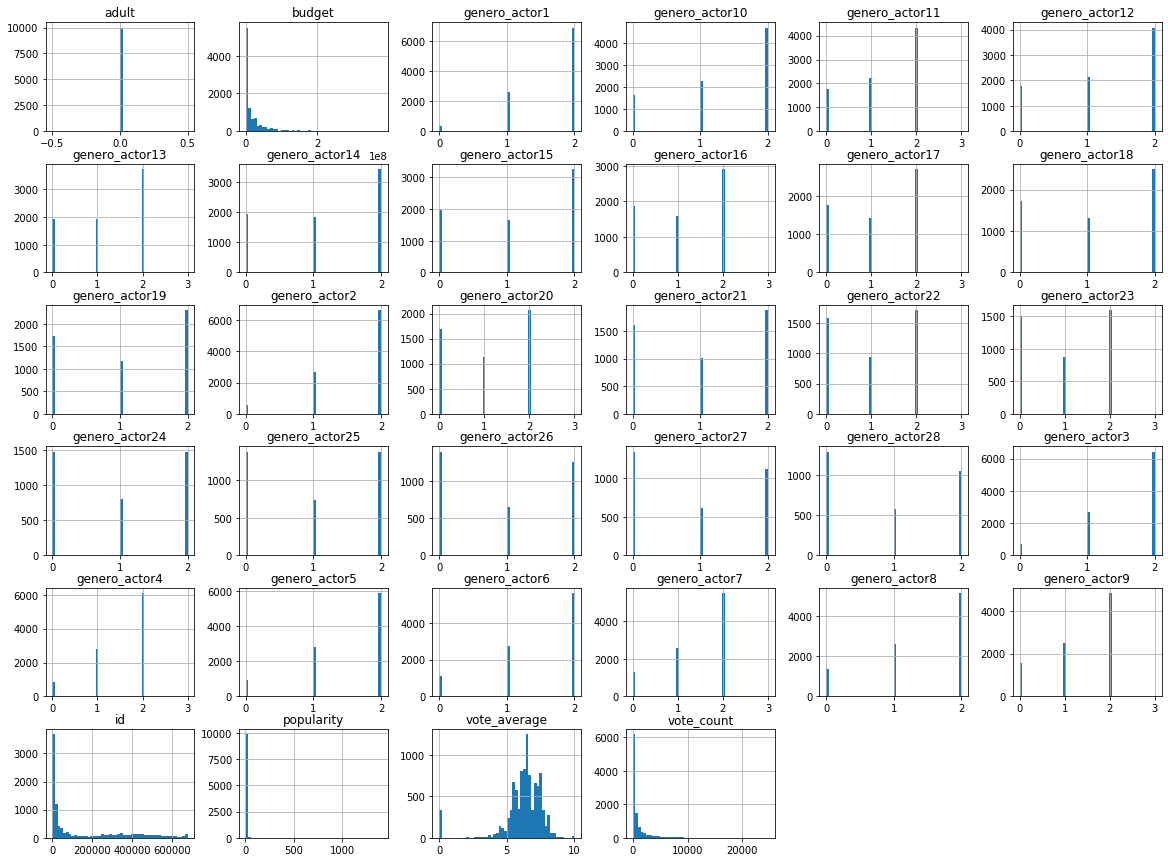

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Si analizamos el histrograma de nuestra variable objetivo **vote_average** vemos que la mayoría de valoraciones está entre 5 y 8 y que no hay ninguna mayor de 10. En cambio sí hay alguna con 0.

## División del dataset en train y test
Antes de entrar a mirar valores de cada variable, dividimos el dataframe en dos partes, una para entrenamiento y otra para pruebas. Hacemos este paso antes de mirar los datos para no tropezarnos con algún patrón en ellos y enfocar nuestro modelo erróneamente.

Importante en la división establecer una semilla (random_state) concreta para poder replicar la separación siempre de la misma forma para que en el caso de auditar el modelo, podamos conseguir siempre la misma división.

La librería Scikit-Learn tiene una función muy útil para hacer la separación.

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

# Guardo en csv la separación
train_set.to_csv('./datasets/train.csv', sep=';', decimal='.', index=False)
test_set.to_csv('./datasets/test.csv', sep=';', decimal='.', index=False)

In [166]:
import pandas as pd
import os

# Leo desde el csv de train
train_set = pd.read_csv('./datasets/train.csv', sep=';', decimal='.')

## Mirando correlaciones
Calculamos el coeficiente de correlación entre la variable objetivo y el resto de variables

In [167]:
matriz_corr = train_set.corr()

matriz_corr['vote_average'].sort_values(ascending=False)

vote_average      1.000000
vote_count        0.223058
genero_actor1     0.097456
genero_actor2     0.091975
genero_actor3     0.082933
genero_actor23    0.076298
genero_actor21    0.068577
genero_actor4     0.068231
genero_actor14    0.066012
genero_actor9     0.059907
genero_actor13    0.056860
budget            0.052811
genero_actor15    0.052522
genero_actor11    0.052455
genero_actor6     0.050360
genero_actor5     0.049188
genero_actor7     0.048714
genero_actor26    0.048223
genero_actor17    0.043879
genero_actor8     0.042962
genero_actor10    0.040121
genero_actor24    0.039793
genero_actor12    0.038316
popularity        0.036263
genero_actor20    0.035962
genero_actor27    0.033358
genero_actor25    0.030983
genero_actor22    0.026119
genero_actor18    0.025251
genero_actor19    0.022335
genero_actor16    0.021049
genero_actor28    0.018719
id               -0.326442
adult                  NaN
Name: vote_average, dtype: float64

Vemos que la variable más correlada a la variable objetivo es **vote_count** aún así la correlación no es demasiado alta.

Vamos a mostrar la corrlación de forma gráfica:

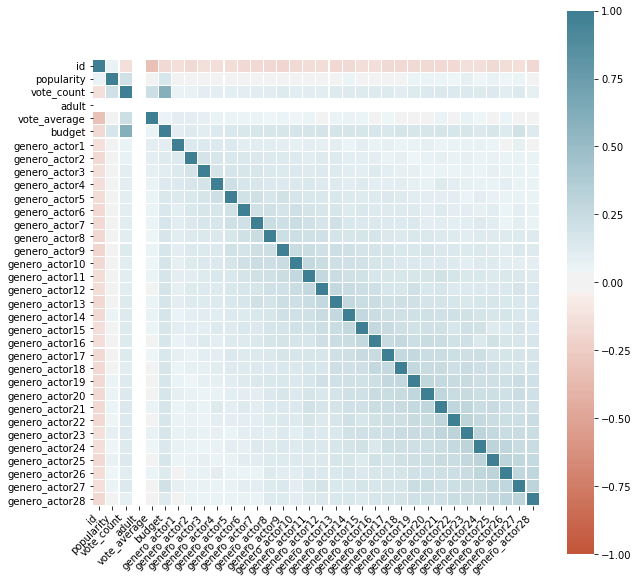

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_corr = train_set.corr()

fig, ax = plt.subplots(figsize=(10,10))  # Tamaño

ax = sns.heatmap(
    matriz_corr, 
    vmin=-1, vmax=1, center=0,linewidths=.1,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Se ve claramente que la variable **adult** no tiene correlación alguna, seguramente sea porque siempre tiene el mismo valor. Más adelante lo comprobaremos y si es así la eliminaremos.

# Data cleaning
Vamos a comprobar los valores de la columna **adult**:

In [169]:
train_set.shape

(8000, 76)

Hasta el momento tenemos 8000 observaciones y 76 variables.

In [170]:
train_set['adult'].value_counts()

False    8000
Name: adult, dtype: int64

Vemos que efectivamente, la variable adult siempre tiene False, la eliminamos:

In [171]:
train_set.drop(['adult'], axis=1, inplace=True)
train_set.shape

(8000, 75)

Analizamos ahora los valores de las variables NO numéricas:

In [172]:
import numpy as np
pd.set_option('display.max_columns', None)  # Fuerzo a que muestre todas las columnas
train_set.select_dtypes(exclude=[np.number]).head()

,type,poster_path,backdrop_path,original_language,original_title,title,overview,release_date,imdb_id,local_poster_path,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10,actor11,actor12,actor13,actor14,actor15,actor16,actor17,actor18,actor19,actor20,actor21,actor22,actor23,actor24,actor25,actor26,actor27,actor28,genero1,genero2,productora1,productora2
0,Movie,/gNW7mTbXYF11YNIgpqwcTYxzO49.jpg,/mpzIULJhWFVrqylATpcAnGOviYc.jpg,ja,アウトレイジ,Outrage,"The story begins with Sekiuchi, boss of the Sa...",2010-05-17,tt1462667,..\img\45284.jpg,Jun Kunimura,Takeshi Kitano,Tomokazu Miura,Ryo Kase,Eihi Shiina,Fumiyo Kohinata,Kippei Shiina,Renji Ishibashi,Hideo Nakano,Tetta Sugimoto,Yuka Itaya,Takashi Tsukamoto,Sôichirô Kitamura,Kenji Morinaga,Naoko Watanabe,Akiko Kobayashi,Yûya Takayama,Masaki Miura,Tokio Emoto,Shin'yû Fujiwara,Tadashi Sakata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Crime,Tokyo FM Broadcasting Co.,NaN
1,Movie,/8wphfcxLmA58weK9jsIsgRWBECQ.jpg,/dLqfJYEqa8jdBkwNc5Nns7WKzTB.jpg,en,Turbo: A Power Rangers Movie,Turbo: A Power Rangers Movie,The legendary Power Rangers must stop the evil...,1997-03-27,tt0120389,..\img\6499.jpg,Edwin Neal,Johnny Yong Bosch,Nakia Burrise,Jason David Frank,Blake Foster,Catherine Sutherland,Amy Jo Johnson,Steve Cardenas,Hilary Shepard,Paul Schrier,Austin St. John,Richard Genelle,Gregg Bullock,Jason Narvy,Carla Perez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Saban Entertainment,20th Century Fox
2,Movie,/9aVhW8KoKSn6l35n1WXAHZkqdwj.jpg,/6O7TMiTUF4fdh5Jn3Xe3GtPwk2X.jpg,en,Big Stan,Big Stan,Rob Schneider writes and stars in this comedy ...,2007-06-06,tt0490086,..\img\13161.jpg,David Carradine,M. Emmet Walsh,Marcia Wallace,Scott Wilson,Sally Kirkland,Richard Riehle,Henry Gibson,Richard Kind,Kevin Gage,Jennifer Morrison,Brandon T. Jackson,Bob Sapp,Rob Schneider,Olivia Munn,Jackson Rathbone,Dan Haggerty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,NaN,From Out of Nowhere Productions,Crystal Sky Pictures
3,Movie,/8ruWIYmYvLIzDLYCi9SpC0FLfHE.jpg,/xsUSbUW4I0jEVMHCsgkDhDYpk0X.jpg,fr,Tais-toi !,Ruby & Quentin,After hiding his loot and getting thrown in ja...,2003-10-22,tt0310203,..\img\7229.jpg,Jean Reno,Loïc Brabant,Leonor Varela,Ticky Holgado,Aurélien Recoing,Gérard Depardieu,André Dussollier,Michel Aumont,Jean-Michel Noirey,Richard Berry,Edgar Givry,Jean-Pierre Malo,Laurent Gamelon,Vincent Moscato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,Crime,Union Générale Cinématographique (UGC),DD Productions
4,Movie,/nC4W7JYMoqFxRBx2HR2MYDYq8Lr.jpg,/5EIo0RhsNbi7FkFkcf34nL2Z8Ch.jpg,en,Honey,Honey,Honey Daniels dreams of making a name for hers...,2003-11-24,tt0322589,..\img\10028.jpg,Mekhi Phifer,Joy Bryant,Jessica Alba,Alison Sealy-Smith,Romeo Miller,David Moscow,Zachary Isaiah Williams,Missy Elliott,Anthony Sherwood,Lonette McKee,Maestro,Judi Embden,Scott Neil,Jull Weber,Sarah Francis,Kevin Duhaney,Brandi Ward,Fonzworth Bentley,Tracy Dawson,Laurieann Gibson,Shawn Desman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Music,Romance,NuAmerica Entertainment,Universal Pictures


In [173]:
train_set['type'].value_counts()

Movie    8000
Name: type, dtype: int64

Todo son películas, la variable no aporta información y la borramos:

In [174]:
train_set.drop(['type'], axis=1, inplace=True)

Las variables que contienen la url de la imagen de la api tampoco aportan información, porque ya tenemos las imágenes descargadas y redimensionadas:

In [175]:
columnas_eliminar = ['poster_path', 'backdrop_path']
train_set.drop(columnas_eliminar, axis=1, inplace=True)

El título y el título original podría servir para un ejercicio de procesamiento de lengaje natural, pero no para este caso. Lo mismo para la sinopsis.

El id de IMDb lo usamos para completar información del presupuesto y no aportará valor al modelo.

In [176]:
columnas_eliminar = ['original_title', 'title', 'overview', 'imdb_id']
train_set.drop(columnas_eliminar, axis=1, inplace=True)

In [177]:
train_set.select_dtypes(exclude=[np.number]).head()

,original_language,release_date,local_poster_path,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10,actor11,actor12,actor13,actor14,actor15,actor16,actor17,actor18,actor19,actor20,actor21,actor22,actor23,actor24,actor25,actor26,actor27,actor28,genero1,genero2,productora1,productora2
0,ja,2010-05-17,..\img\45284.jpg,Jun Kunimura,Takeshi Kitano,Tomokazu Miura,Ryo Kase,Eihi Shiina,Fumiyo Kohinata,Kippei Shiina,Renji Ishibashi,Hideo Nakano,Tetta Sugimoto,Yuka Itaya,Takashi Tsukamoto,Sôichirô Kitamura,Kenji Morinaga,Naoko Watanabe,Akiko Kobayashi,Yûya Takayama,Masaki Miura,Tokio Emoto,Shin'yû Fujiwara,Tadashi Sakata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Crime,Tokyo FM Broadcasting Co.,NaN
1,en,1997-03-27,..\img\6499.jpg,Edwin Neal,Johnny Yong Bosch,Nakia Burrise,Jason David Frank,Blake Foster,Catherine Sutherland,Amy Jo Johnson,Steve Cardenas,Hilary Shepard,Paul Schrier,Austin St. John,Richard Genelle,Gregg Bullock,Jason Narvy,Carla Perez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Saban Entertainment,20th Century Fox
2,en,2007-06-06,..\img\13161.jpg,David Carradine,M. Emmet Walsh,Marcia Wallace,Scott Wilson,Sally Kirkland,Richard Riehle,Henry Gibson,Richard Kind,Kevin Gage,Jennifer Morrison,Brandon T. Jackson,Bob Sapp,Rob Schneider,Olivia Munn,Jackson Rathbone,Dan Haggerty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,NaN,From Out of Nowhere Productions,Crystal Sky Pictures
3,fr,2003-10-22,..\img\7229.jpg,Jean Reno,Loïc Brabant,Leonor Varela,Ticky Holgado,Aurélien Recoing,Gérard Depardieu,André Dussollier,Michel Aumont,Jean-Michel Noirey,Richard Berry,Edgar Givry,Jean-Pierre Malo,Laurent Gamelon,Vincent Moscato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,Crime,Union Générale Cinématographique (UGC),DD Productions
4,en,2003-11-24,..\img\10028.jpg,Mekhi Phifer,Joy Bryant,Jessica Alba,Alison Sealy-Smith,Romeo Miller,David Moscow,Zachary Isaiah Williams,Missy Elliott,Anthony Sherwood,Lonette McKee,Maestro,Judi Embden,Scott Neil,Jull Weber,Sarah Francis,Kevin Duhaney,Brandi Ward,Fonzworth Bentley,Tracy Dawson,Laurieann Gibson,Shawn Desman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Music,Romance,NuAmerica Entertainment,Universal Pictures


In [178]:
train_set.head()

,id,popularity,vote_count,original_language,vote_average,release_date,budget,local_poster_path,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10,actor11,actor12,actor13,actor14,actor15,actor16,actor17,actor18,actor19,actor20,actor21,actor22,actor23,actor24,actor25,actor26,actor27,actor28,genero_actor1,genero_actor2,genero_actor3,genero_actor4,genero_actor5,genero_actor6,genero_actor7,genero_actor8,genero_actor9,genero_actor10,genero_actor11,genero_actor12,genero_actor13,genero_actor14,genero_actor15,genero_actor16,genero_actor17,genero_actor18,genero_actor19,genero_actor20,genero_actor21,genero_actor22,genero_actor23,genero_actor24,genero_actor25,genero_actor26,genero_actor27,genero_actor28,genero1,genero2,productora1,productora2
0,45284,7.312,168,ja,6.9,2010-05-17,0.0,..\img\45284.jpg,Jun Kunimura,Takeshi Kitano,Tomokazu Miura,Ryo Kase,Eihi Shiina,Fumiyo Kohinata,Kippei Shiina,Renji Ishibashi,Hideo Nakano,Tetta Sugimoto,Yuka Itaya,Takashi Tsukamoto,Sôichirô Kitamura,Kenji Morinaga,Naoko Watanabe,Akiko Kobayashi,Yûya Takayama,Masaki Miura,Tokio Emoto,Shin'yû Fujiwara,Tadashi Sakata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Crime,Tokyo FM Broadcasting Co.,NaN
1,6499,6.846,127,en,5.1,1997-03-27,10000000.0,..\img\6499.jpg,Edwin Neal,Johnny Yong Bosch,Nakia Burrise,Jason David Frank,Blake Foster,Catherine Sutherland,Amy Jo Johnson,Steve Cardenas,Hilary Shepard,Paul Schrier,Austin St. John,Richard Genelle,Gregg Bullock,Jason Narvy,Carla Perez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Saban Entertainment,20th Century Fox
2,13161,9.869,340,en,5.8,2007-06-06,10000000.0,..\img\13161.jpg,David Carradine,M. Emmet Walsh,Marcia Wallace,Scott Wilson,Sally Kirkland,Richard Riehle,Henry Gibson,Richard Kind,Kevin Gage,Jennifer Morrison,Brandon T. Jackson,Bob Sapp,Rob Schneider,Olivia Munn,Jackson Rathbone,Dan Haggerty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,NaN,From Out of Nowhere Productions,Crystal Sky Pictures
3,7229,7.939,428,fr,6.7,2003-10-22,27440000.0,..\img\7229.jpg,Jean Reno,Loïc Brabant,Leonor Varela,Ticky Holgado,Aurélien Recoing,Gérard Depardieu,André Dussollier,Michel Aumont,Jean-Michel Noirey,Richard Berry,Edgar Givry,Jean-Pierre Malo,Laurent Gamelon,Vincent Moscato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,Crime,Union Générale Cinématographique (UGC),DD Productions
4,10028,9.859,714,en,6.2,2003-11-24,18000000.0,..\img\10028.jpg,Mekhi Phifer,Joy Bryant,Jessica Alba,Alison Sealy-Smith,Romeo Miller,David Moscow,Zachary Isaiah Williams,Missy Elliott,Anthony Sherwood,Lonette McKee,Maestro,Judi Embden,Scott Neil,Jull Weber,Sarah Francis,Kevin Duhaney,Brandi Ward,Fonzworth Bentley,Tracy Dawson,Laurieann Gibson,Shawn Desman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Music,Romance,NuAmerica Entertainment,Universal Pictures


Las columnas **popularity** y **vote_count** hay que eliminarlas, no porque no aporten información, si no porque lo que estamos intentando es predecir el éxito de una película que todavía no se ha estrenado y no tendría votos ni nivel de popularidad:

In [179]:
columnas_eliminar = ['popularity', 'vote_count']
train_set.drop(columnas_eliminar, axis=1, inplace=True)

In [180]:
train_set.shape

(8000, 66)

Nos quedamos ahora con 66 variables

## Generación de características
Sería interesante generar una nueva característica que indique el número de años de antigüedad de la película.

Antes de crearla, tenemos que ver si la columna tiene valores nulos:

In [181]:
print(train_set['release_date'].isna().sum())

3


Tiene 3 nulos, los eliminamos directamente:

In [182]:
train_set.shape

(8000, 66)

In [183]:
train_set = train_set[train_set['release_date'].isnull() == False]

In [184]:
train_set.shape

(7997, 66)

In [185]:
from datetime import datetime

train_set['release_date'] = train_set['release_date'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
train_set['years_old'] = train_set['release_date'].apply(lambda x: 2020 - x.year)
train_set.head()

,id,original_language,vote_average,release_date,budget,local_poster_path,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10,actor11,actor12,actor13,actor14,actor15,actor16,actor17,actor18,actor19,actor20,actor21,actor22,actor23,actor24,actor25,actor26,actor27,actor28,genero_actor1,genero_actor2,genero_actor3,genero_actor4,genero_actor5,genero_actor6,genero_actor7,genero_actor8,genero_actor9,genero_actor10,genero_actor11,genero_actor12,genero_actor13,genero_actor14,genero_actor15,genero_actor16,genero_actor17,genero_actor18,genero_actor19,genero_actor20,genero_actor21,genero_actor22,genero_actor23,genero_actor24,genero_actor25,genero_actor26,genero_actor27,genero_actor28,genero1,genero2,productora1,productora2,years_old
0,45284,ja,6.9,2010-05-17,0.0,..\img\45284.jpg,Jun Kunimura,Takeshi Kitano,Tomokazu Miura,Ryo Kase,Eihi Shiina,Fumiyo Kohinata,Kippei Shiina,Renji Ishibashi,Hideo Nakano,Tetta Sugimoto,Yuka Itaya,Takashi Tsukamoto,Sôichirô Kitamura,Kenji Morinaga,Naoko Watanabe,Akiko Kobayashi,Yûya Takayama,Masaki Miura,Tokio Emoto,Shin'yû Fujiwara,Tadashi Sakata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Crime,Tokyo FM Broadcasting Co.,NaN,10
1,6499,en,5.1,1997-03-27,10000000.0,..\img\6499.jpg,Edwin Neal,Johnny Yong Bosch,Nakia Burrise,Jason David Frank,Blake Foster,Catherine Sutherland,Amy Jo Johnson,Steve Cardenas,Hilary Shepard,Paul Schrier,Austin St. John,Richard Genelle,Gregg Bullock,Jason Narvy,Carla Perez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Saban Entertainment,20th Century Fox,23
2,13161,en,5.8,2007-06-06,10000000.0,..\img\13161.jpg,David Carradine,M. Emmet Walsh,Marcia Wallace,Scott Wilson,Sally Kirkland,Richard Riehle,Henry Gibson,Richard Kind,Kevin Gage,Jennifer Morrison,Brandon T. Jackson,Bob Sapp,Rob Schneider,Olivia Munn,Jackson Rathbone,Dan Haggerty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,NaN,From Out of Nowhere Productions,Crystal Sky Pictures,13
3,7229,fr,6.7,2003-10-22,27440000.0,..\img\7229.jpg,Jean Reno,Loïc Brabant,Leonor Varela,Ticky Holgado,Aurélien Recoing,Gérard Depardieu,André Dussollier,Michel Aumont,Jean-Michel Noirey,Richard Berry,Edgar Givry,Jean-Pierre Malo,Laurent Gamelon,Vincent Moscato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,Crime,Union Générale Cinématographique (UGC),DD Productions,17
4,10028,en,6.2,2003-11-24,18000000.0,..\img\10028.jpg,Mekhi Phifer,Joy Bryant,Jessica Alba,Alison Sealy-Smith,Romeo Miller,David Moscow,Zachary Isaiah Williams,Missy Elliott,Anthony Sherwood,Lonette McKee,Maestro,Judi Embden,Scott Neil,Jull Weber,Sarah Francis,Kevin Duhaney,Brandi Ward,Fonzworth Bentley,Tracy Dawson,Laurieann Gibson,Shawn Desman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Music,Romance,NuAmerica Entertainment,Universal Pictures,17


También aportaría valor separar la fecha de lanzamiento en "año lanzamiento", "mes lanzamiento" y "día lanzamiento":

In [186]:
train_set['release_year'] = train_set['release_date'].apply(lambda x: x.year)
train_set['release_month'] = train_set['release_date'].apply(lambda x: x.month)
train_set['release_day'] = train_set['release_date'].apply(lambda x: x.day)
train_set.head()

,id,original_language,vote_average,release_date,budget,local_poster_path,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10,actor11,actor12,actor13,actor14,actor15,actor16,actor17,actor18,actor19,actor20,actor21,actor22,actor23,actor24,actor25,actor26,actor27,actor28,genero_actor1,genero_actor2,genero_actor3,genero_actor4,genero_actor5,genero_actor6,genero_actor7,genero_actor8,genero_actor9,genero_actor10,genero_actor11,genero_actor12,genero_actor13,genero_actor14,genero_actor15,genero_actor16,genero_actor17,genero_actor18,genero_actor19,genero_actor20,genero_actor21,genero_actor22,genero_actor23,genero_actor24,genero_actor25,genero_actor26,genero_actor27,genero_actor28,genero1,genero2,productora1,productora2,years_old,release_year,release_month,release_day
0,45284,ja,6.9,2010-05-17,0.0,..\img\45284.jpg,Jun Kunimura,Takeshi Kitano,Tomokazu Miura,Ryo Kase,Eihi Shiina,Fumiyo Kohinata,Kippei Shiina,Renji Ishibashi,Hideo Nakano,Tetta Sugimoto,Yuka Itaya,Takashi Tsukamoto,Sôichirô Kitamura,Kenji Morinaga,Naoko Watanabe,Akiko Kobayashi,Yûya Takayama,Masaki Miura,Tokio Emoto,Shin'yû Fujiwara,Tadashi Sakata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Crime,Tokyo FM Broadcasting Co.,NaN,10,2010,5,17
1,6499,en,5.1,1997-03-27,10000000.0,..\img\6499.jpg,Edwin Neal,Johnny Yong Bosch,Nakia Burrise,Jason David Frank,Blake Foster,Catherine Sutherland,Amy Jo Johnson,Steve Cardenas,Hilary Shepard,Paul Schrier,Austin St. John,Richard Genelle,Gregg Bullock,Jason Narvy,Carla Perez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Saban Entertainment,20th Century Fox,23,1997,3,27
2,13161,en,5.8,2007-06-06,10000000.0,..\img\13161.jpg,David Carradine,M. Emmet Walsh,Marcia Wallace,Scott Wilson,Sally Kirkland,Richard Riehle,Henry Gibson,Richard Kind,Kevin Gage,Jennifer Morrison,Brandon T. Jackson,Bob Sapp,Rob Schneider,Olivia Munn,Jackson Rathbone,Dan Haggerty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,NaN,From Out of Nowhere Productions,Crystal Sky Pictures,13,2007,6,6
3,7229,fr,6.7,2003-10-22,27440000.0,..\img\7229.jpg,Jean Reno,Loïc Brabant,Leonor Varela,Ticky Holgado,Aurélien Recoing,Gérard Depardieu,André Dussollier,Michel Aumont,Jean-Michel Noirey,Richard Berry,Edgar Givry,Jean-Pierre Malo,Laurent Gamelon,Vincent Moscato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,Crime,Union Générale Cinématographique (UGC),DD Productions,17,2003,10,22
4,10028,en,6.2,2003-11-24,18000000.0,..\img\10028.jpg,Mekhi Phifer,Joy Bryant,Jessica Alba,Alison Sealy-Smith,Romeo Miller,David Moscow,Zachary Isaiah Williams,Missy Elliott,Anthony Sherwood,Lonette McKee,Maestro,Judi Embden,Scott Neil,Jull Weber,Sarah Francis,Kevin Duhaney,Brandi Ward,Fonzworth Bentley,Tracy Dawson,Laurieann Gibson,Shawn Desman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Music,Romance,NuAmerica Entertainment,Universal Pictures,17,2003,11,24


Borramos ahora la fecha de lanzamiento:

In [187]:
train_set.drop(['release_date'], axis=1, inplace=True)

## Tratamiento de Nan
Vamos a analizar los nulos en las columnas que quedan en el dataset, hay algunos missings en las columnas de actores, géneros de actores y productoras, para estos casos los rellenaremos con **0** dando a entender que no hay actor o productora.

Recordamos que esas columnas las generamos calculando la media de actores que aparecen en una película, porque lo creíamos información relevante y no podemos tratar esta información como una variable categórica ya que hay miles de actores y productoras y no sería viable generar una columna por cada uno que exista.

Para el resto de missings, los rellenaremos con el valor más frecuente utilizando **SimpleImputer** de **ScikitLearn**.

Vamos a ver los valores nulos de cada columna:

In [188]:
for i in train_set.columns:
    print('Columna', i, 'nulos:', train_set.loc[:,i].isna().sum())

Columna id nulos: 0
Columna original_language nulos: 0
Columna vote_average nulos: 0
Columna budget nulos: 1
Columna local_poster_path nulos: 76
Columna actor1 nulos: 75
Columna actor2 nulos: 124
Columna actor3 nulos: 164
Columna actor4 nulos: 209
Columna actor5 nulos: 287
Columna actor6 nulos: 396
Columna actor7 nulos: 519
Columna actor8 nulos: 687
Columna actor9 nulos: 878
Columna actor10 nulos: 1083
Columna actor11 nulos: 1327
Columna actor12 nulos: 1590
Columna actor13 nulos: 1898
Columna actor14 nulos: 2190
Columna actor15 nulos: 2479
Columna actor16 nulos: 2888
Columna actor17 nulos: 3234
Columna actor18 nulos: 3553
Columna actor19 nulos: 3823
Columna actor20 nulos: 4075
Columna actor21 nulos: 4388
Columna actor22 nulos: 4587
Columna actor23 nulos: 4798
Columna actor24 nulos: 4980
Columna actor25 nulos: 5173
Columna actor26 nulos: 5343
Columna actor27 nulos: 5500
Columna actor28 nulos: 5638
Columna genero_actor1 nulos: 75
Columna genero_actor2 nulos: 124
Columna genero_actor3 nul

Vemos que rellenar los nulos de **budget**, en **local_poster_path** tenemos 76 nulos, esos registros directamente los eliminamos porque necesitamos que cada registro tenga una imagen asociada para la red neuronal.

Antes de rellenar el presupuesto que falta, vamos a eliminar las filas que no tienen imagen por si una de ellas es la que no tiene presupuesto.

In [189]:
train_set = train_set[train_set['local_poster_path'].isnull() == False]

In [190]:
train_set.shape

(7921, 69)

In [191]:
print(train_set['budget'].isna().sum())

1


Sigue estando el nulo en el presupuesto, vamos a rellenarlo con la media.

También quitaremos los nulos de los actores, productoras, géneros de películas y géneros de actores, pero esta vez, rellenando con 0.

In [192]:
train_set['budget'].fillna(train_set['budget'].mean(), inplace=True)

In [193]:
# Actores
train_set['actor1'].fillna(value='0', inplace=True)
train_set['actor2'].fillna(value='0', inplace=True)
train_set['actor3'].fillna(value='0', inplace=True)
train_set['actor4'].fillna(value='0', inplace=True)
train_set['actor5'].fillna(value='0', inplace=True)
train_set['actor6'].fillna(value='0', inplace=True)
train_set['actor7'].fillna(value='0', inplace=True)
train_set['actor8'].fillna(value='0', inplace=True)
train_set['actor9'].fillna(value='0', inplace=True)
train_set['actor10'].fillna(value='0', inplace=True)
train_set['actor11'].fillna(value='0', inplace=True)
train_set['actor12'].fillna(value='0', inplace=True)
train_set['actor13'].fillna(value='0', inplace=True)
train_set['actor14'].fillna(value='0', inplace=True)
train_set['actor15'].fillna(value='0', inplace=True)
train_set['actor16'].fillna(value='0', inplace=True)
train_set['actor17'].fillna(value='0', inplace=True)
train_set['actor18'].fillna(value='0', inplace=True)
train_set['actor19'].fillna(value='0', inplace=True)
train_set['actor20'].fillna(value='0', inplace=True)
train_set['actor21'].fillna(value='0', inplace=True)
train_set['actor22'].fillna(value='0', inplace=True)
train_set['actor23'].fillna(value='0', inplace=True)
train_set['actor24'].fillna(value='0', inplace=True)
train_set['actor25'].fillna(value='0', inplace=True)
train_set['actor26'].fillna(value='0', inplace=True)
train_set['actor27'].fillna(value='0', inplace=True)
train_set['actor28'].fillna(value='0', inplace=True)

# Generos
train_set['genero_actor1'].fillna(value='0', inplace=True)
train_set['genero_actor2'].fillna(value='0', inplace=True)
train_set['genero_actor3'].fillna(value='0', inplace=True)
train_set['genero_actor4'].fillna(value='0', inplace=True)
train_set['genero_actor5'].fillna(value='0', inplace=True)
train_set['genero_actor6'].fillna(value='0', inplace=True)
train_set['genero_actor7'].fillna(value='0', inplace=True)
train_set['genero_actor8'].fillna(value='0', inplace=True)
train_set['genero_actor9'].fillna(value='0', inplace=True)
train_set['genero_actor10'].fillna(value='0', inplace=True)
train_set['genero_actor11'].fillna(value='0', inplace=True)
train_set['genero_actor12'].fillna(value='0', inplace=True)
train_set['genero_actor13'].fillna(value='0', inplace=True)
train_set['genero_actor14'].fillna(value='0', inplace=True)
train_set['genero_actor15'].fillna(value='0', inplace=True)
train_set['genero_actor16'].fillna(value='0', inplace=True)
train_set['genero_actor17'].fillna(value='0', inplace=True)
train_set['genero_actor18'].fillna(value='0', inplace=True)
train_set['genero_actor19'].fillna(value='0', inplace=True)
train_set['genero_actor20'].fillna(value='0', inplace=True)
train_set['genero_actor21'].fillna(value='0', inplace=True)
train_set['genero_actor22'].fillna(value='0', inplace=True)
train_set['genero_actor23'].fillna(value='0', inplace=True)
train_set['genero_actor24'].fillna(value='0', inplace=True)
train_set['genero_actor25'].fillna(value='0', inplace=True)
train_set['genero_actor26'].fillna(value='0', inplace=True)
train_set['genero_actor27'].fillna(value='0', inplace=True)
train_set['genero_actor28'].fillna(value='0', inplace=True)

# Géneros de películas
train_set['genero1'].fillna(value='0', inplace=True)
train_set['genero2'].fillna(value='0', inplace=True)

# Productoras
train_set['productora1'].fillna(value='0', inplace=True)
train_set['productora2'].fillna(value='0', inplace=True)

In [194]:
for i in train_set.columns:
    print('Columna', i, 'nulos:', train_set.loc[:,i].isna().sum())

Columna id nulos: 0
Columna original_language nulos: 0
Columna vote_average nulos: 0
Columna budget nulos: 0
Columna local_poster_path nulos: 0
Columna actor1 nulos: 0
Columna actor2 nulos: 0
Columna actor3 nulos: 0
Columna actor4 nulos: 0
Columna actor5 nulos: 0
Columna actor6 nulos: 0
Columna actor7 nulos: 0
Columna actor8 nulos: 0
Columna actor9 nulos: 0
Columna actor10 nulos: 0
Columna actor11 nulos: 0
Columna actor12 nulos: 0
Columna actor13 nulos: 0
Columna actor14 nulos: 0
Columna actor15 nulos: 0
Columna actor16 nulos: 0
Columna actor17 nulos: 0
Columna actor18 nulos: 0
Columna actor19 nulos: 0
Columna actor20 nulos: 0
Columna actor21 nulos: 0
Columna actor22 nulos: 0
Columna actor23 nulos: 0
Columna actor24 nulos: 0
Columna actor25 nulos: 0
Columna actor26 nulos: 0
Columna actor27 nulos: 0
Columna actor28 nulos: 0
Columna genero_actor1 nulos: 0
Columna genero_actor2 nulos: 0
Columna genero_actor3 nulos: 0
Columna genero_actor4 nulos: 0
Columna genero_actor5 nulos: 0
Columna ge

In [195]:
train_set

,id,original_language,vote_average,budget,local_poster_path,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10,actor11,actor12,actor13,actor14,actor15,actor16,actor17,actor18,actor19,actor20,actor21,actor22,actor23,actor24,actor25,actor26,actor27,actor28,genero_actor1,genero_actor2,genero_actor3,genero_actor4,genero_actor5,genero_actor6,genero_actor7,genero_actor8,genero_actor9,genero_actor10,genero_actor11,genero_actor12,genero_actor13,genero_actor14,genero_actor15,genero_actor16,genero_actor17,genero_actor18,genero_actor19,genero_actor20,genero_actor21,genero_actor22,genero_actor23,genero_actor24,genero_actor25,genero_actor26,genero_actor27,genero_actor28,genero1,genero2,productora1,productora2,years_old,release_year,release_month,release_day
0,45284,ja,6.9,0.0,..\img\45284.jpg,Jun Kunimura,Takeshi Kitano,Tomokazu Miura,Ryo Kase,Eihi Shiina,Fumiyo Kohinata,Kippei Shiina,Renji Ishibashi,Hideo Nakano,Tetta Sugimoto,Yuka Itaya,Takashi Tsukamoto,Sôichirô Kitamura,Kenji Morinaga,Naoko Watanabe,Akiko Kobayashi,Yûya Takayama,Masaki Miura,Tokio Emoto,Shin'yû Fujiwara,Tadashi Sakata,0,0,0,0,0,0,0,2,2,2,2,1,2,2,2,2,2,1,2,2,0,1,1,2,2,2,0,0,0,0,0,0,0,0,0,Action,Crime,Tokyo FM Broadcasting Co.,0,10,2010,5,17
1,6499,en,5.1,10000000.0,..\img\6499.jpg,Edwin Neal,Johnny Yong Bosch,Nakia Burrise,Jason David Frank,Blake Foster,Catherine Sutherland,Amy Jo Johnson,Steve Cardenas,Hilary Shepard,Paul Schrier,Austin St. John,Richard Genelle,Gregg Bullock,Jason Narvy,Carla Perez,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,2,1,1,2,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Action,Adventure,Saban Entertainment,20th Century Fox,23,1997,3,27
2,13161,en,5.8,10000000.0,..\img\13161.jpg,David Carradine,M. Emmet Walsh,Marcia Wallace,Scott Wilson,Sally Kirkland,Richard Riehle,Henry Gibson,Richard Kind,Kevin Gage,Jennifer Morrison,Brandon T. Jackson,Bob Sapp,Rob Schneider,Olivia Munn,Jackson Rathbone,Dan Haggerty,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,2,2,2,2,1,2,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,Comedy,0,From Out of Nowhere Productions,Crystal Sky Pictures,13,2007,6,6
3,7229,fr,6.7,27440000.0,..\img\7229.jpg,Jean Reno,Loïc Brabant,Leonor Varela,Ticky Holgado,Aurélien Recoing,Gérard Depardieu,André Dussollier,Michel Aumont,Jean-Michel Noirey,Richard Berry,Edgar Givry,Jean-Pierre Malo,Laurent Gamelon,Vincent Moscato,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2,2,2,2,2,0,2,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Comedy,Crime,Union Générale Cinématographique (UGC),DD Productions,17,2003,10,22
4,10028,en,6.2,18000000.0,..\img\10028.jpg,Mekhi Phifer,Joy Bryant,Jessica Alba,Alison Sealy-Smith,Romeo Miller,David Moscow,Zachary Isaiah Williams,Missy Elliott,Anthony Sherwood,Lonette McKee,Maestro,Judi Embden,Scott Neil,Jull Weber,Sarah Francis,Kevin Duhaney,Brandi Ward,Fonzworth Bentley,Tracy Dawson,Laurieann Gibson,Shawn Desman,0,0,0,0,0,0,0,2,1,1,1,0,2,0,1,2,1,2,0,0,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,Music,Romance,NuAmerica Entertainment,Universal Pictures,17,2003,11,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,11427,en,6.5,900000.0,..\img\11427.jpg,Ray Wise,Lin Shaye,Amber Smith,Clement Blake,Billy Asher,Mick Cain,Alexandra Holden,Steve Valentine,Jimmie F. Skaggs,Sharon Madden,Karen S. Gregan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,2,2,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Horror,Mystery,Sagittaire Films,Captain Movies,17,2003,1,30
7996,5951,en,6.6,0.0,..\img\5951.jpg,Maria Bello,Kathy Baker,Emily Blunt,Kevin Zegers,Maggie Grace,Hugh Dancy,Amy Brenneman,Nancy Travis,Lynn Redgrave,Jimmy Smits,Marc Blucas,Parisa Fitz-Henley,Gwendoline Yeo,Stephanie Denise Griffin,Myndy Crist,Jessie Anne Spence,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,1,2,1,1,1,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Comedy,Romance,Mockingbird Pictures,John Calley Productions,13,20

## Variables categóricas
Vamos a convertir variables categóricas a números. Las columnas categóricas que nos quedan son las siguientes:

- original_language
- actores
- géneros de películas
- productoras

In [196]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

train_set['original_language'] = ordinal_encoder.fit_transform(train_set['original_language'].values.reshape(-1,1))
train_set

,id,original_language,vote_average,budget,local_poster_path,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10,actor11,actor12,actor13,actor14,actor15,actor16,actor17,actor18,actor19,actor20,actor21,actor22,actor23,actor24,actor25,actor26,actor27,actor28,genero_actor1,genero_actor2,genero_actor3,genero_actor4,genero_actor5,genero_actor6,genero_actor7,genero_actor8,genero_actor9,genero_actor10,genero_actor11,genero_actor12,genero_actor13,genero_actor14,genero_actor15,genero_actor16,genero_actor17,genero_actor18,genero_actor19,genero_actor20,genero_actor21,genero_actor22,genero_actor23,genero_actor24,genero_actor25,genero_actor26,genero_actor27,genero_actor28,genero1,genero2,productora1,productora2,years_old,release_year,release_month,release_day
0,45284,21.0,6.9,0.0,..\img\45284.jpg,Jun Kunimura,Takeshi Kitano,Tomokazu Miura,Ryo Kase,Eihi Shiina,Fumiyo Kohinata,Kippei Shiina,Renji Ishibashi,Hideo Nakano,Tetta Sugimoto,Yuka Itaya,Takashi Tsukamoto,Sôichirô Kitamura,Kenji Morinaga,Naoko Watanabe,Akiko Kobayashi,Yûya Takayama,Masaki Miura,Tokio Emoto,Shin'yû Fujiwara,Tadashi Sakata,0,0,0,0,0,0,0,2,2,2,2,1,2,2,2,2,2,1,2,2,0,1,1,2,2,2,0,0,0,0,0,0,0,0,0,Action,Crime,Tokyo FM Broadcasting Co.,0,10,2010,5,17
1,6499,9.0,5.1,10000000.0,..\img\6499.jpg,Edwin Neal,Johnny Yong Bosch,Nakia Burrise,Jason David Frank,Blake Foster,Catherine Sutherland,Amy Jo Johnson,Steve Cardenas,Hilary Shepard,Paul Schrier,Austin St. John,Richard Genelle,Gregg Bullock,Jason Narvy,Carla Perez,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,2,1,1,2,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Action,Adventure,Saban Entertainment,20th Century Fox,23,1997,3,27
2,13161,9.0,5.8,10000000.0,..\img\13161.jpg,David Carradine,M. Emmet Walsh,Marcia Wallace,Scott Wilson,Sally Kirkland,Richard Riehle,Henry Gibson,Richard Kind,Kevin Gage,Jennifer Morrison,Brandon T. Jackson,Bob Sapp,Rob Schneider,Olivia Munn,Jackson Rathbone,Dan Haggerty,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,2,2,2,2,1,2,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,Comedy,0,From Out of Nowhere Productions,Crystal Sky Pictures,13,2007,6,6
3,7229,14.0,6.7,27440000.0,..\img\7229.jpg,Jean Reno,Loïc Brabant,Leonor Varela,Ticky Holgado,Aurélien Recoing,Gérard Depardieu,André Dussollier,Michel Aumont,Jean-Michel Noirey,Richard Berry,Edgar Givry,Jean-Pierre Malo,Laurent Gamelon,Vincent Moscato,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2,2,2,2,2,0,2,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Comedy,Crime,Union Générale Cinématographique (UGC),DD Productions,17,2003,10,22
4,10028,9.0,6.2,18000000.0,..\img\10028.jpg,Mekhi Phifer,Joy Bryant,Jessica Alba,Alison Sealy-Smith,Romeo Miller,David Moscow,Zachary Isaiah Williams,Missy Elliott,Anthony Sherwood,Lonette McKee,Maestro,Judi Embden,Scott Neil,Jull Weber,Sarah Francis,Kevin Duhaney,Brandi Ward,Fonzworth Bentley,Tracy Dawson,Laurieann Gibson,Shawn Desman,0,0,0,0,0,0,0,2,1,1,1,0,2,0,1,2,1,2,0,0,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,Music,Romance,NuAmerica Entertainment,Universal Pictures,17,2003,11,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,11427,9.0,6.5,900000.0,..\img\11427.jpg,Ray Wise,Lin Shaye,Amber Smith,Clement Blake,Billy Asher,Mick Cain,Alexandra Holden,Steve Valentine,Jimmie F. Skaggs,Sharon Madden,Karen S. Gregan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,2,2,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Horror,Mystery,Sagittaire Films,Captain Movies,17,2003,1,30
7996,5951,9.0,6.6,0.0,..\img\5951.jpg,Maria Bello,Kathy Baker,Emily Blunt,Kevin Zegers,Maggie Grace,Hugh Dancy,Amy Brenneman,Nancy Travis,Lynn Redgrave,Jimmy Smits,Marc Blucas,Parisa Fitz-Henley,Gwendoline Yeo,Stephanie Denise Griffin,Myndy Crist,Jessie Anne Spence,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,1,2,1,1,1,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Comedy,Romance,Mockingbird Pictures,John Calley Producti

In [197]:
# Comprobar categorias
ordinal_encoder.categories_

[array(['af', 'ar', 'bn', 'bs', 'cn', 'cs', 'da', 'de', 'el', 'en', 'es',
        'eu', 'fa', 'fi', 'fr', 'he', 'hi', 'hu', 'id', 'is', 'it', 'ja',
        'kn', 'ko', 'ml', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sq',
        'sr', 'sv', 'ta', 'te', 'th', 'tl', 'tr', 'uk', 'vi', 'xx', 'zh'],
       dtype=object)]

In [198]:
# Aplicamos al resto de variables categoricas
ordinal_encoder = OrdinalEncoder()
train_set['actor1'] = ordinal_encoder.fit_transform(train_set['actor1'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor2'] = ordinal_encoder.fit_transform(train_set['actor2'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor3'] = ordinal_encoder.fit_transform(train_set['actor3'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor4'] = ordinal_encoder.fit_transform(train_set['actor4'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor5'] = ordinal_encoder.fit_transform(train_set['actor5'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor6'] = ordinal_encoder.fit_transform(train_set['actor6'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor7'] = ordinal_encoder.fit_transform(train_set['actor7'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor8'] = ordinal_encoder.fit_transform(train_set['actor8'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor9'] = ordinal_encoder.fit_transform(train_set['actor9'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor10'] = ordinal_encoder.fit_transform(train_set['actor10'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor11'] = ordinal_encoder.fit_transform(train_set['actor11'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor12'] = ordinal_encoder.fit_transform(train_set['actor12'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor13'] = ordinal_encoder.fit_transform(train_set['actor13'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor14'] = ordinal_encoder.fit_transform(train_set['actor14'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor15'] = ordinal_encoder.fit_transform(train_set['actor15'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor16'] = ordinal_encoder.fit_transform(train_set['actor16'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor17'] = ordinal_encoder.fit_transform(train_set['actor17'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor18'] = ordinal_encoder.fit_transform(train_set['actor18'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor19'] = ordinal_encoder.fit_transform(train_set['actor19'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor20'] = ordinal_encoder.fit_transform(train_set['actor20'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor21'] = ordinal_encoder.fit_transform(train_set['actor21'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor22'] = ordinal_encoder.fit_transform(train_set['actor22'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor23'] = ordinal_encoder.fit_transform(train_set['actor23'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor24'] = ordinal_encoder.fit_transform(train_set['actor24'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor25'] = ordinal_encoder.fit_transform(train_set['actor25'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor26'] = ordinal_encoder.fit_transform(train_set['actor26'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor27'] = ordinal_encoder.fit_transform(train_set['actor27'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['actor28'] = ordinal_encoder.fit_transform(train_set['actor28'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['genero1'] = ordinal_encoder.fit_transform(train_set['genero1'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['genero2'] = ordinal_encoder.fit_transform(train_set['genero2'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['productora1'] = ordinal_encoder.fit_transform(train_set['productora1'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
train_set['productora2'] = ordinal_encoder.fit_transform(train_set['productora2'].values.reshape(-1,1))

In [199]:
train_set

,id,original_language,vote_average,budget,local_poster_path,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8,actor9,actor10,actor11,actor12,actor13,actor14,actor15,actor16,actor17,actor18,actor19,actor20,actor21,actor22,actor23,actor24,actor25,actor26,actor27,actor28,genero_actor1,genero_actor2,genero_actor3,genero_actor4,genero_actor5,genero_actor6,genero_actor7,genero_actor8,genero_actor9,genero_actor10,genero_actor11,genero_actor12,genero_actor13,genero_actor14,genero_actor15,genero_actor16,genero_actor17,genero_actor18,genero_actor19,genero_actor20,genero_actor21,genero_actor22,genero_actor23,genero_actor24,genero_actor25,genero_actor26,genero_actor27,genero_actor28,genero1,genero2,productora1,productora2,years_old,release_year,release_month,release_day
0,45284,21.0,6.9,0.0,..\img\45284.jpg,1547.0,3788.0,4564.0,4475.0,1501.0,1825.0,3217.0,4753.0,2243.0,5544.0,5926.0,5284.0,5142.0,2866.0,3698.0,64.0,4528.0,2736.0,3722.0,3291.0,3194.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,2,2,1,2,2,2,2,2,1,2,2,0,1,1,2,2,2,0,0,0,0,0,0,0,0,0,1.0,4.0,3143.0,0.0,10,2010,5,17
1,6499,9.0,5.1,10000000.0,..\img\6499.jpg,801.0,1962.0,3370.0,2142.0,597.0,839.0,246.0,5428.0,2245.0,4545.0,477.0,4611.0,1939.0,2276.0,717.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,2,2,1,1,2,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,2657.0,15.0,23,1997,3,27
2,13161,9.0,5.8,10000000.0,..\img\13161.jpg,656.0,2491.0,2947.0,4570.0,4681.0,4698.0,2131.0,4808.0,3275.0,2623.0,714.0,620.0,4523.0,3965.0,2085.0,983.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,1,2,1,2,2,2,2,1,2,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,4.0,0.0,1158.0,644.0,13,2007,6,6
3,7229,14.0,6.7,27440000.0,..\img\7229.jpg,1285.0,2456.0,2751.0,4945.0,442.0,2020.0,303.0,4037.0,2593.0,4817.0,1645.0,2441.0,3164.0,5257.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0,1,2,2,2,2,2,0,2,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,3233.0,656.0,17,2003,10,22
4,10028,9.0,6.2,18000000.0,..\img\10028.jpg,2053.0,2022.0,2074.0,180.0,4577.0,1291.0,5979.0,4125.0,392.0,3602.0,3620.0,2861.0,4813.0,2708.0,4416.0,2641.0,508.0,1308.0,3790.0,2086.0,3051.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,1,1,0,2,0,1,2,1,2,0,0,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,12.0,13.0,2145.0,2596.0,17,2003,11,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,11427,9.0,6.5,900000.0,..\img\11427.jpg,2462.0,2409.0,173.0,926.0,574.0,3948.0,161.0,5449.0,2724.0,5236.0,3045.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,1,2,2,2,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,12.0,2658.0,468.0,17,2003,1,30
7996,5951,9.0,6.6,0.0,..\img\5951.jpg,1921.0,2150.0,1297.0,2830.0,3364.0,2159.0,242.0,4190.0,3676.0,2723.0,3657.0,4254.0,1972.0,4794.0,3684.0,2194.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,2,1,2,1,1,1,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4.0,13.0,1994.0,1343.0,13,2007,9,9
7997,155,9.0,8.4,185000000.0,..\img\155.jpg,968.0,2878.0,4765.0,3184.0,2018.0,390.0,1028.0,1052.0,4041.0,7.0,5606.0,4659.0,1217.0,3845.0,3780.0,1310.0,1333.0,3039.0,3884.0,3661.0,3432.0,2475.0,2346.0,1521.0,129.0,1840.0,2004.0,1527.0,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1.0,4.0,745.0,1461.0,12,2008,7,16
7998,416477,9.0,7.4,5000000.0,..\img\416477.jpg,212.0,3256.0,1735.0,3694.0,5614.0,5112.0,1257.0,3483.0,45.0,4767.0,661.0,2457.0,2450.0,238.0,3269.0,2703.0,4485.0,2763.0,2190.0,34.0,1388.0,2310.0,2791.0,2584.0,1570.0,2517.0,2150.0,623.0,2,2,1,1,1,1,2,1,2,1,2,2,2,2,1,2,2,2,2,1,2,1,1,1,1,1,1,2,4.0,13.0,136.0,937.0,3,2017,3,30


# Guardamos el dataset limpio
Una vez hecha la limpieza, guardamos los resultado es un nuevo csv y generamos otro con la columna de la imagen, que se usará cuando combinemos los datos numéricos con las imágenes en la red neuronal.

In [200]:
nuevoTrainImagenes = train_set[['id', 'local_poster_path']].copy()
nuevoTrainImagenes.to_csv('./datasets/imagenes_train_final.csv', sep=';', decimal='.', index=False)

columnasNoImport = ['id', 'local_poster_path']
train_set = train_set.drop(columnasNoImport, axis=1, inplace=False)
train_set.to_csv('./datasets/train_final.csv', sep=';', decimal='.', index=False)

# Aplicar las mismas transformaciones a los datos de test
Ahora toca aplicar las mismas transformaciones que hemos hecho en los datos de entrenamiento a los datos de test.

In [201]:
import pandas as pd
import os

# Leo desde el csv de test
test_set = pd.read_csv('./datasets/test.csv', sep=';', decimal='.')

test_set.drop(['adult'], axis=1, inplace=True)
test_set.drop(['type'], axis=1, inplace=True)

columnas_eliminar = ['poster_path', 'backdrop_path']
test_set.drop(columnas_eliminar, axis=1, inplace=True)

columnas_eliminar = ['original_title', 'title', 'overview', 'imdb_id']
test_set.drop(columnas_eliminar, axis=1, inplace=True)

columnas_eliminar = ['popularity', 'vote_count']
test_set.drop(columnas_eliminar, axis=1, inplace=True)

test_set = test_set[test_set['release_date'].isnull() == False]

from datetime import datetime

test_set['release_date'] = test_set['release_date'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
test_set['years_old'] = test_set['release_date'].apply(lambda x: 2020 - x.year)

test_set['release_year'] = test_set['release_date'].apply(lambda x: x.year)
test_set['release_month'] = test_set['release_date'].apply(lambda x: x.month)
test_set['release_day'] = test_set['release_date'].apply(lambda x: x.day)

test_set.drop(['release_date'], axis=1, inplace=True)

test_set = test_set[test_set['local_poster_path'].isnull() == False]

test_set['budget'].fillna(test_set['budget'].mean(), inplace=True)

test_set['actor1'].fillna(value='0', inplace=True)
test_set['actor2'].fillna(value='0', inplace=True)
test_set['actor3'].fillna(value='0', inplace=True)
test_set['actor4'].fillna(value='0', inplace=True)
test_set['actor5'].fillna(value='0', inplace=True)
test_set['actor6'].fillna(value='0', inplace=True)
test_set['actor7'].fillna(value='0', inplace=True)
test_set['actor8'].fillna(value='0', inplace=True)
test_set['actor9'].fillna(value='0', inplace=True)
test_set['actor10'].fillna(value='0', inplace=True)
test_set['actor11'].fillna(value='0', inplace=True)
test_set['actor12'].fillna(value='0', inplace=True)
test_set['actor13'].fillna(value='0', inplace=True)
test_set['actor14'].fillna(value='0', inplace=True)
test_set['actor15'].fillna(value='0', inplace=True)
test_set['actor16'].fillna(value='0', inplace=True)
test_set['actor17'].fillna(value='0', inplace=True)
test_set['actor18'].fillna(value='0', inplace=True)
test_set['actor19'].fillna(value='0', inplace=True)
test_set['actor20'].fillna(value='0', inplace=True)
test_set['actor21'].fillna(value='0', inplace=True)
test_set['actor22'].fillna(value='0', inplace=True)
test_set['actor23'].fillna(value='0', inplace=True)
test_set['actor24'].fillna(value='0', inplace=True)
test_set['actor25'].fillna(value='0', inplace=True)
test_set['actor26'].fillna(value='0', inplace=True)
test_set['actor27'].fillna(value='0', inplace=True)
test_set['actor28'].fillna(value='0', inplace=True)

# Generos
test_set['genero_actor1'].fillna(value='0', inplace=True)
test_set['genero_actor2'].fillna(value='0', inplace=True)
test_set['genero_actor3'].fillna(value='0', inplace=True)
test_set['genero_actor4'].fillna(value='0', inplace=True)
test_set['genero_actor5'].fillna(value='0', inplace=True)
test_set['genero_actor6'].fillna(value='0', inplace=True)
test_set['genero_actor7'].fillna(value='0', inplace=True)
test_set['genero_actor8'].fillna(value='0', inplace=True)
test_set['genero_actor9'].fillna(value='0', inplace=True)
test_set['genero_actor10'].fillna(value='0', inplace=True)
test_set['genero_actor11'].fillna(value='0', inplace=True)
test_set['genero_actor12'].fillna(value='0', inplace=True)
test_set['genero_actor13'].fillna(value='0', inplace=True)
test_set['genero_actor14'].fillna(value='0', inplace=True)
test_set['genero_actor15'].fillna(value='0', inplace=True)
test_set['genero_actor16'].fillna(value='0', inplace=True)
test_set['genero_actor17'].fillna(value='0', inplace=True)
test_set['genero_actor18'].fillna(value='0', inplace=True)
test_set['genero_actor19'].fillna(value='0', inplace=True)
test_set['genero_actor20'].fillna(value='0', inplace=True)
test_set['genero_actor21'].fillna(value='0', inplace=True)
test_set['genero_actor22'].fillna(value='0', inplace=True)
test_set['genero_actor23'].fillna(value='0', inplace=True)
test_set['genero_actor24'].fillna(value='0', inplace=True)
test_set['genero_actor25'].fillna(value='0', inplace=True)
test_set['genero_actor26'].fillna(value='0', inplace=True)
test_set['genero_actor27'].fillna(value='0', inplace=True)
test_set['genero_actor28'].fillna(value='0', inplace=True)

# Géneros de películas
test_set['genero1'].fillna(value='0', inplace=True)
test_set['genero2'].fillna(value='0', inplace=True)

# Productoras
test_set['productora1'].fillna(value='0', inplace=True)
test_set['productora2'].fillna(value='0', inplace=True)

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

test_set['original_language'] = ordinal_encoder.fit_transform(test_set['original_language'].values.reshape(-1,1))

# Aplicamos al resto de variables categoricas
ordinal_encoder = OrdinalEncoder()
test_set['actor1'] = ordinal_encoder.fit_transform(test_set['actor1'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor2'] = ordinal_encoder.fit_transform(test_set['actor2'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor3'] = ordinal_encoder.fit_transform(test_set['actor3'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor4'] = ordinal_encoder.fit_transform(test_set['actor4'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor5'] = ordinal_encoder.fit_transform(test_set['actor5'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor6'] = ordinal_encoder.fit_transform(test_set['actor6'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor7'] = ordinal_encoder.fit_transform(test_set['actor7'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor8'] = ordinal_encoder.fit_transform(test_set['actor8'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor9'] = ordinal_encoder.fit_transform(test_set['actor9'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor10'] = ordinal_encoder.fit_transform(test_set['actor10'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor11'] = ordinal_encoder.fit_transform(test_set['actor11'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor12'] = ordinal_encoder.fit_transform(test_set['actor12'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor13'] = ordinal_encoder.fit_transform(test_set['actor13'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor14'] = ordinal_encoder.fit_transform(test_set['actor14'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor15'] = ordinal_encoder.fit_transform(test_set['actor15'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor16'] = ordinal_encoder.fit_transform(test_set['actor16'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor17'] = ordinal_encoder.fit_transform(test_set['actor17'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor18'] = ordinal_encoder.fit_transform(test_set['actor18'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor19'] = ordinal_encoder.fit_transform(test_set['actor19'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor20'] = ordinal_encoder.fit_transform(test_set['actor20'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor21'] = ordinal_encoder.fit_transform(test_set['actor21'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor22'] = ordinal_encoder.fit_transform(test_set['actor22'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor23'] = ordinal_encoder.fit_transform(test_set['actor23'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor24'] = ordinal_encoder.fit_transform(test_set['actor24'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor25'] = ordinal_encoder.fit_transform(test_set['actor25'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor26'] = ordinal_encoder.fit_transform(test_set['actor26'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor27'] = ordinal_encoder.fit_transform(test_set['actor27'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['actor28'] = ordinal_encoder.fit_transform(test_set['actor28'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['genero1'] = ordinal_encoder.fit_transform(test_set['genero1'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['genero2'] = ordinal_encoder.fit_transform(test_set['genero2'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['productora1'] = ordinal_encoder.fit_transform(test_set['productora1'].values.reshape(-1,1))

ordinal_encoder = OrdinalEncoder()
test_set['productora2'] = ordinal_encoder.fit_transform(test_set['productora2'].values.reshape(-1,1))

nuevoTestImagenes = test_set[['id', 'local_poster_path']].copy()
nuevoTestImagenes.to_csv('./datasets/imagenes_test_final.csv', sep=';', decimal='.', index=False)

columnasNoImport = ['id', 'local_poster_path']
test_set = test_set.drop(columnasNoImport, axis=1, inplace=False)
test_set.to_csv('./datasets/test_final.csv', sep=';', decimal='.', index=False)